In [7]:
from scipy import stats

In [8]:
from gradients import *

In [9]:
surf_labels, mask_removed = load_atlas()

from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# pairwise

In [10]:
d1 = pd.read_csv('../regressed_RL_data/rois_pairwise_stats.csv')

In [11]:
d1

indic  roi                           pair     tstat    pvalue  signif
0       ecc    0       baseline__early_learning  1.532938  0.129337       0
1       ecc    0        baseline__late_learning  0.399270  0.690785       0
2       ecc    0             baseline__learning -0.316059  0.752802       0
3       ecc    0                 baseline__rest -0.346659  0.729781       0
4       ecc    0  early_learning__late_learning -1.100251  0.274607       0
...     ...  ...                            ...       ...       ...     ...
59875  necc  997       early_learning__learning  0.272949  0.785614       0
59876  necc  997           early_learning__rest  0.464821  0.643355       0
59877  necc  997        late_learning__learning -0.225610  0.822094       0
59878  necc  997            late_learning__rest -0.033531  0.973336       0
59879  necc  997                 learning__rest  0.185509  0.853312       0

[59880 rows x 6 columns]

In [13]:
statistics = ['tstat']
indicators = ['ecc',
#  'grad1'
 ]
data_range = {
    'fstat': (0, 10),
    'tstat': (-3, 3)
}
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'tstat': 'bwr',
    'pvalue': 'gist_gray',
}

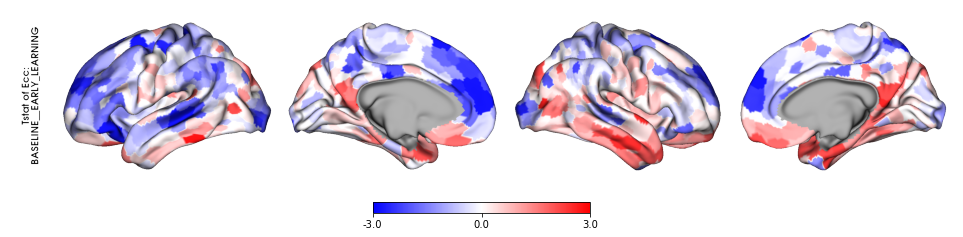

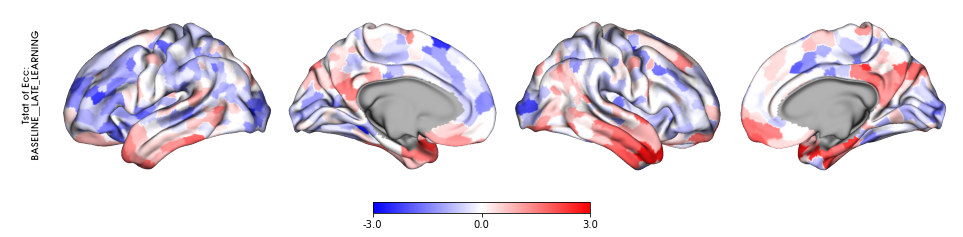

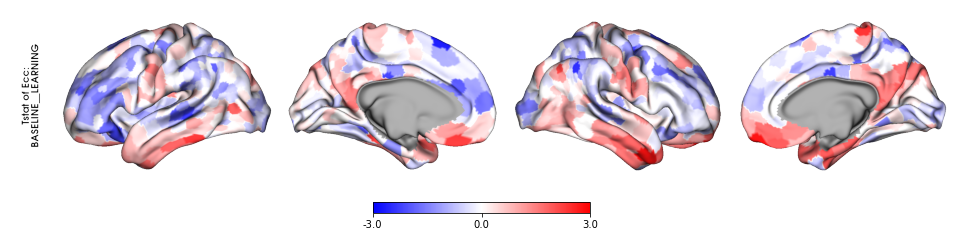

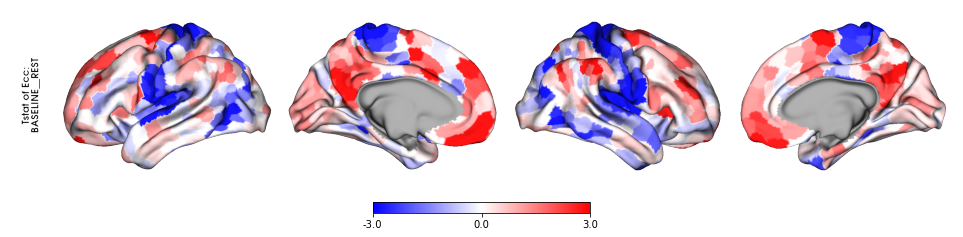

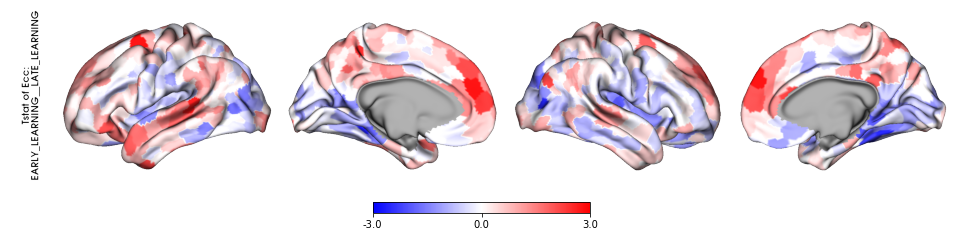

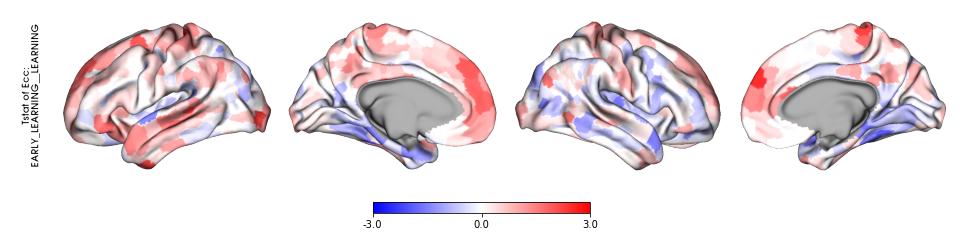

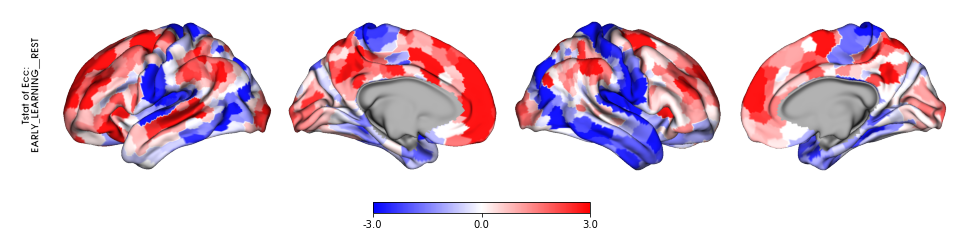

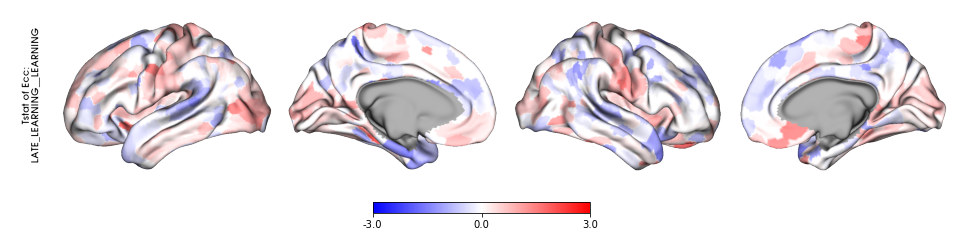

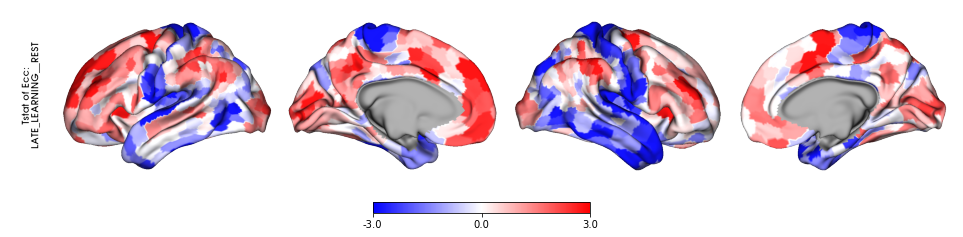

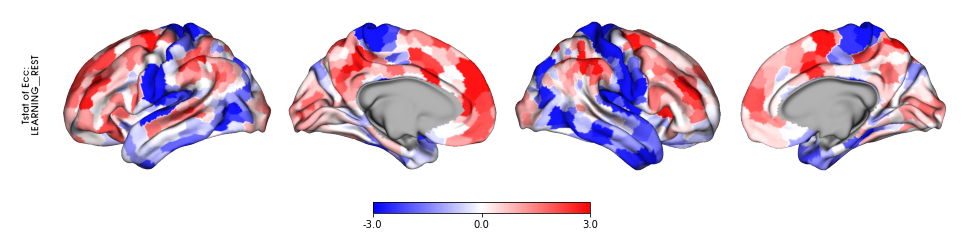

In [14]:
for c in indicators:
    for pair in d1['pair'].unique():
        d = d1[(d1['indic'] == c)&(d1['pair'] == pair)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, s.capitalize() + ' of ' + c.capitalize() + ':\n' + pair.upper(),
            cmap[s], data_range[s])

# anova

In [15]:
d2 = pd.read_csv('../regressed_RL_data/rois_anova_stats.csv')

In [16]:
d2

indic  roi     fstat    pvalue  signif
0      ecc    0  1.169241  0.325659       0
1      ecc    1  0.747001  0.561096       0
2      ecc    2  0.839652  0.501517       0
3      ecc    3  0.400628  0.808051       0
4      ecc    4  4.902185  0.000868       1
...    ...  ...       ...       ...     ...
5983  necc  993  2.746663  0.029613       1
5984  necc  994  0.219490  0.927346       0
5985  necc  995  0.072268  0.990430       0
5986  necc  996  1.962119  0.101828       0
5987  necc  997  0.198004  0.939190       0

[5988 rows x 5 columns]

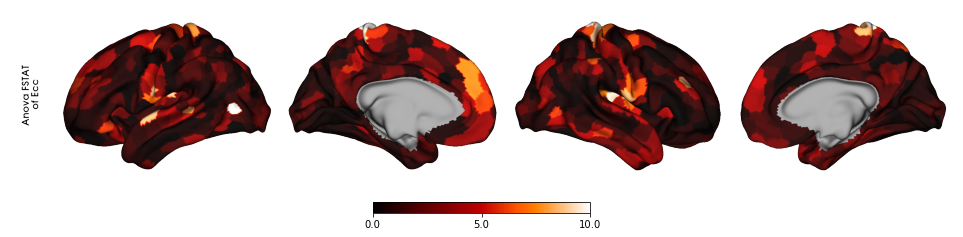

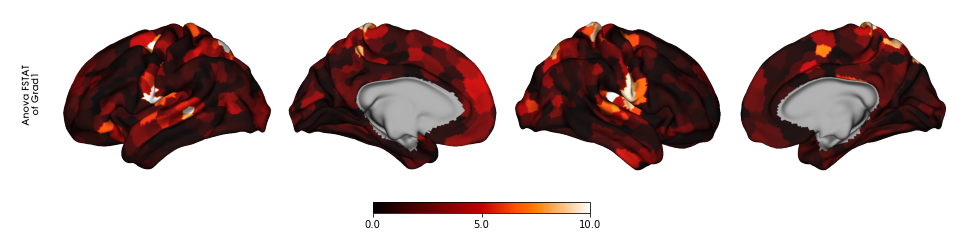

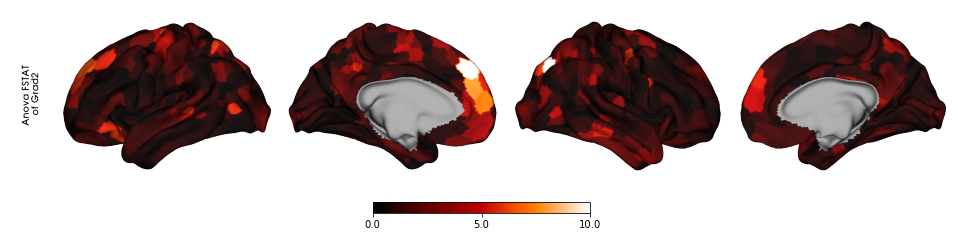

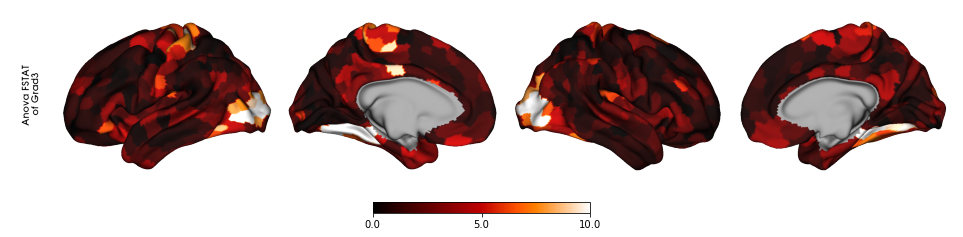

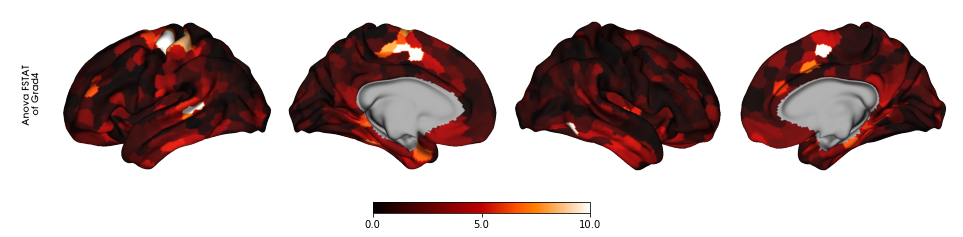

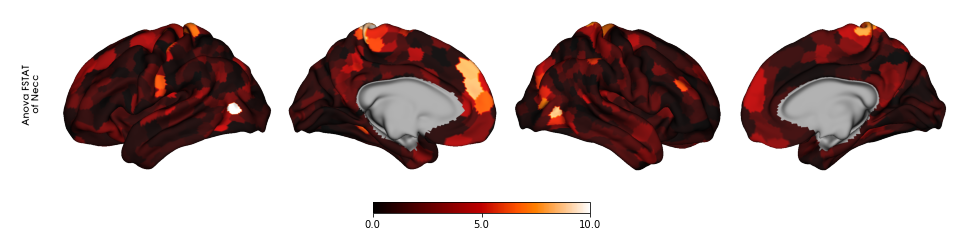

In [17]:
statistics = ['fstat']
indicators = d2.indic.unique()
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'pvalue': 'gist_gray'
}
data_range = {
    'fstat': (0, 10)
}

for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], data_range[s])

# repeated measures anova

In [18]:
import pingouin as pg

In [19]:
df = pd.read_csv('../regressed_RL_data/subjects_gradients_ecc.csv')

In [20]:
d = df.groupby(['indic', 'roi']).apply(pg.rm_anova, dv='value', within='epic', subject='subj')

In [21]:
ALPHA = 0.05

In [22]:
d[d['p-unc'] < ALPHA].reset_index().groupby('indic').size()

indic
ecc      489
grad1    506
grad2    363
grad3    566
grad4    453
necc     410
dtype: int64

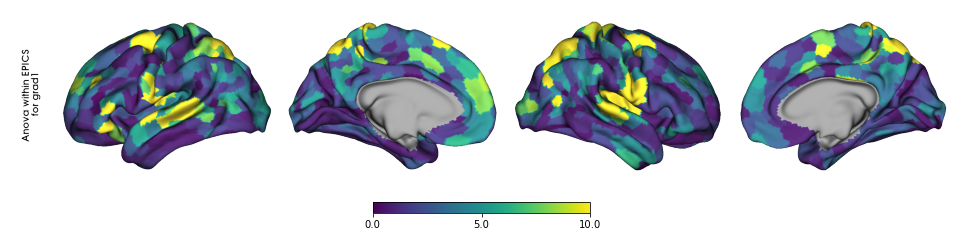

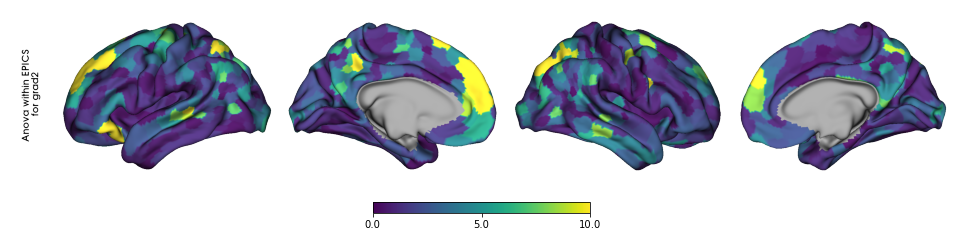

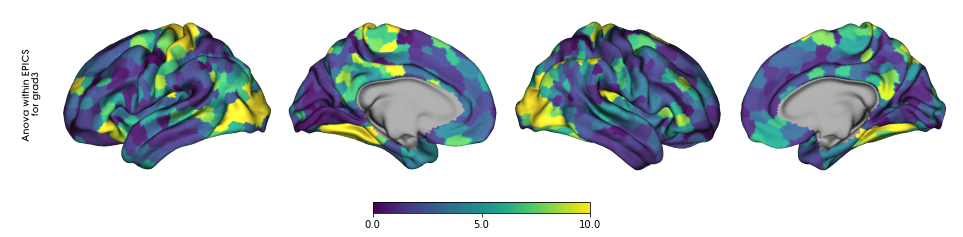

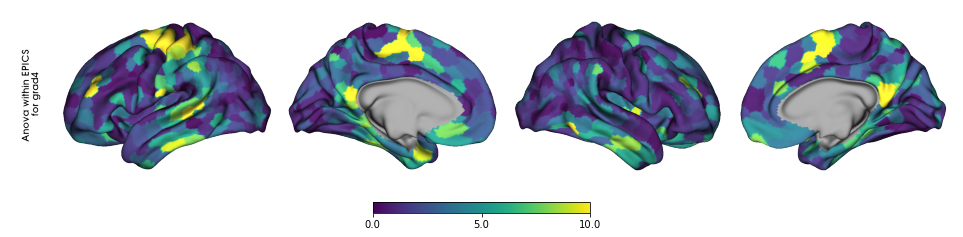

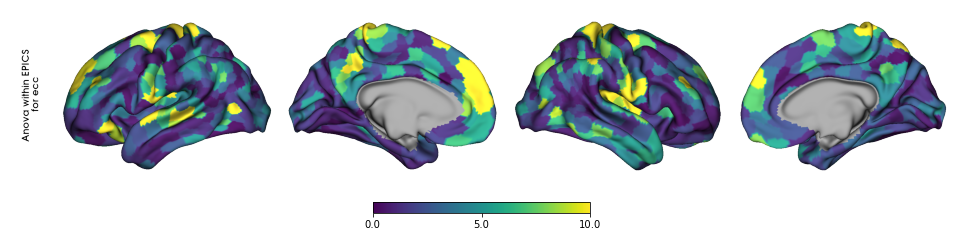

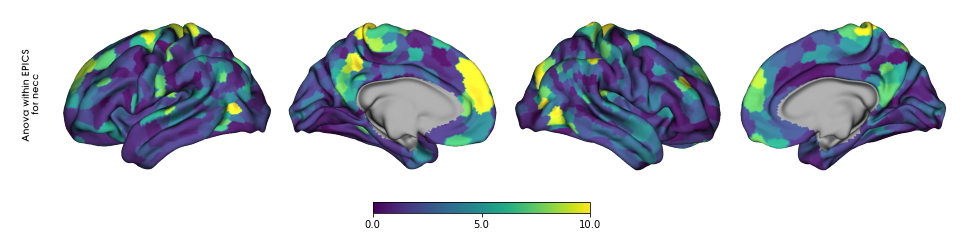

In [23]:
# Anova's F value
data_range = (0, 10)

for indic in df.indic.unique():
    data = d.loc[indic]['F']
    data = np.array(data)
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', data_range)

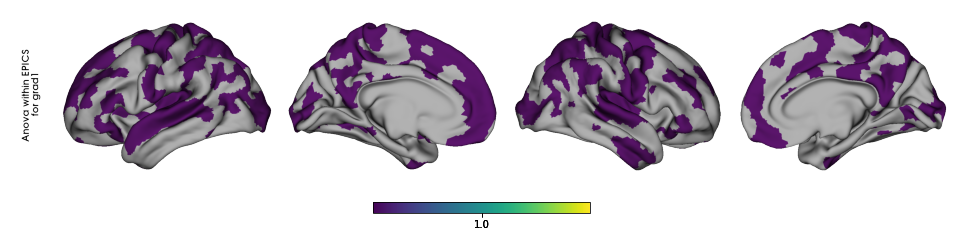

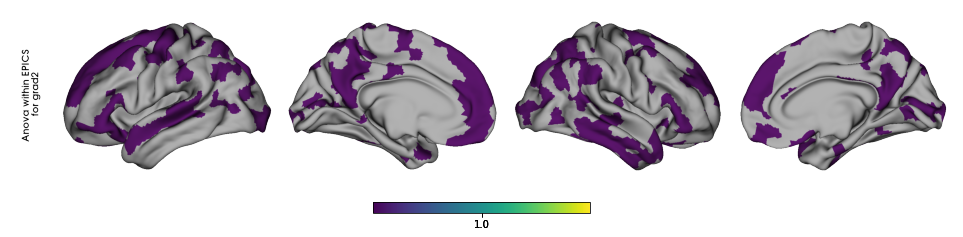

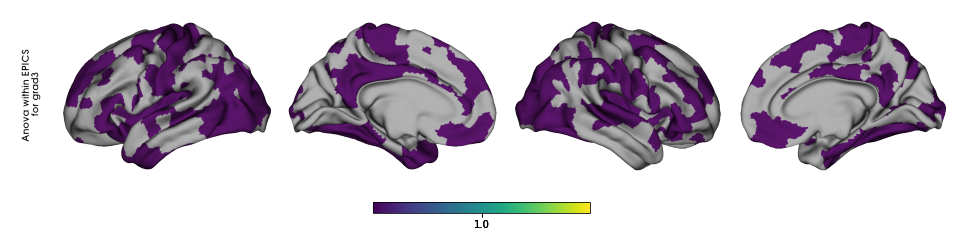

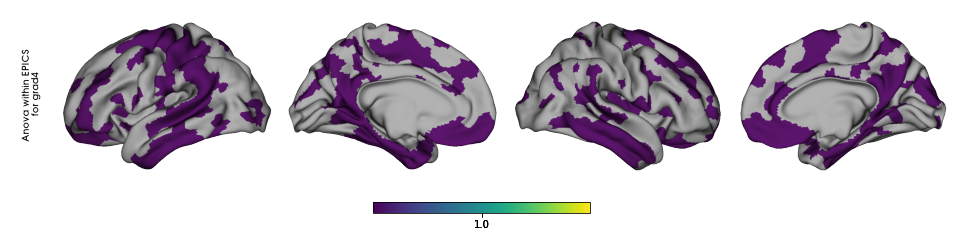

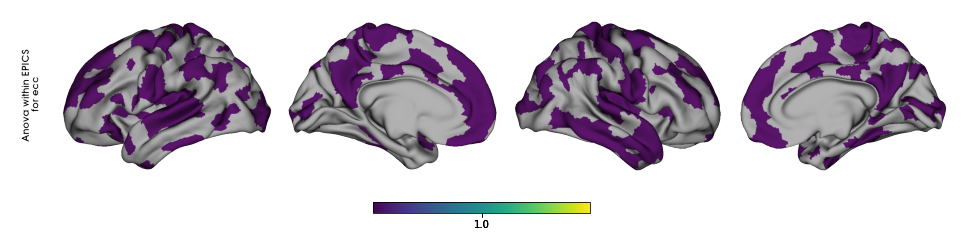

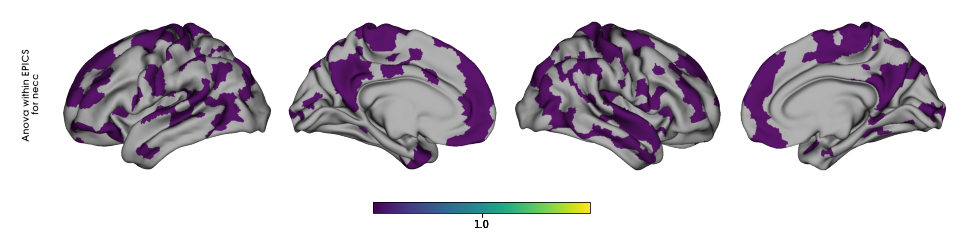

In [24]:
# significance

for indic in df.indic.unique():
    data = d.loc[indic]
    data = data[data['p-unc'] < ALPHA]
    data = np.array(data)
    data = np.array(d.loc[indic]['p-unc']) < ALPHA
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)

# false discovery rate

In [25]:
# Bonferroni correction ('bonf') in which the p-values are multiplied by the number of comparisons.
# Less conservative methods are also included such as Sidak (1967) ('sidak'),
# Holm (1979) ('holm'), Benjamini & Hochberg (1995) ('fdr_bh'),
# and Benjamini & Yekutieli (2001) ('fdr_by')

FDR_METHOD = 'bonf'

number of fdr-corrected ROIs for  grad1  is  1
number of fdr-corrected ROIs for  grad2  is  2
number of fdr-corrected ROIs for  grad3  is  14
number of fdr-corrected ROIs for  grad4  is  10
number of fdr-corrected ROIs for  ecc  is  6


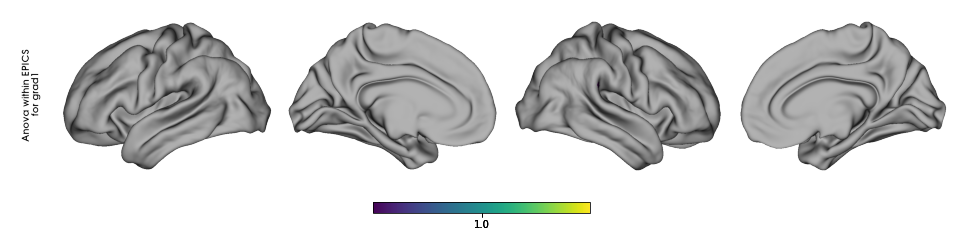

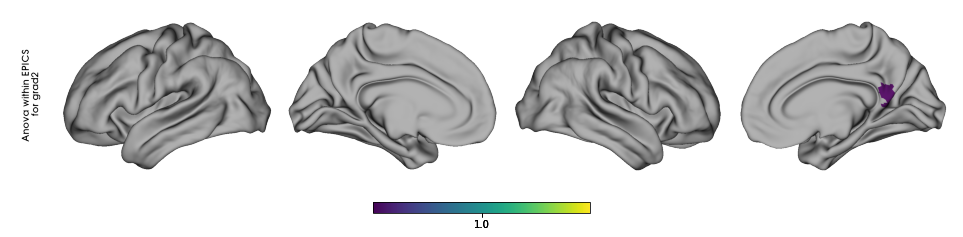

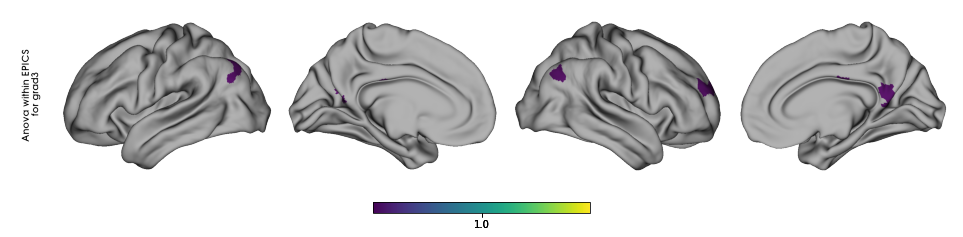

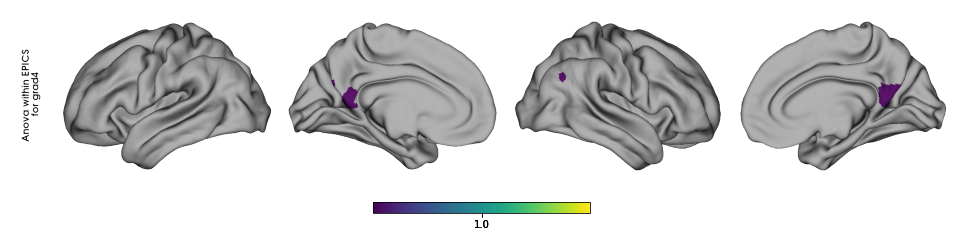

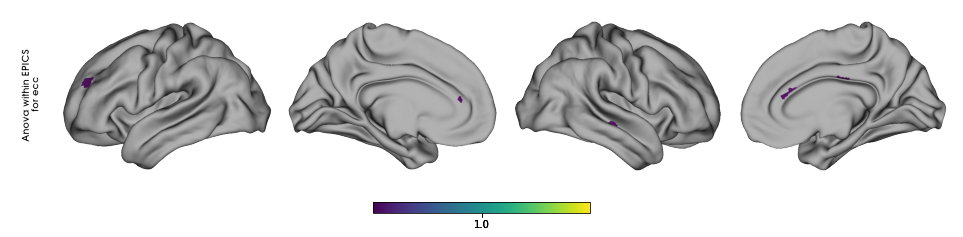

In [26]:
for indic in df.indic.unique():
    data = d.loc[indic]

    pvals = data['p-unc'].tolist()
    signif, pvals_corr = pg.multicomp(pvals, method=FDR_METHOD)

    print('number of fdr-corrected ROIs for ', indic, ' is ', signif.sum())

    data = signif
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)

number of fdr-corrected ROIs for  grad1  is  1
number of fdr-corrected ROIs for  grad2  is  2
number of fdr-corrected ROIs for  grad3  is  14
number of fdr-corrected ROIs for  grad4  is  10
number of fdr-corrected ROIs for  ecc  is  6


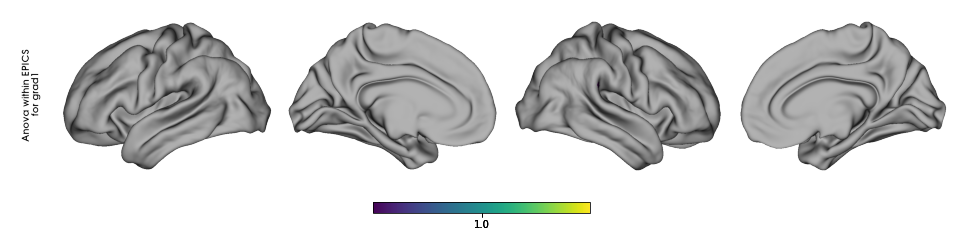

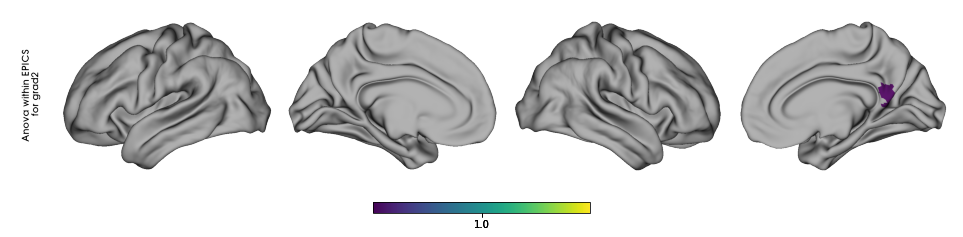

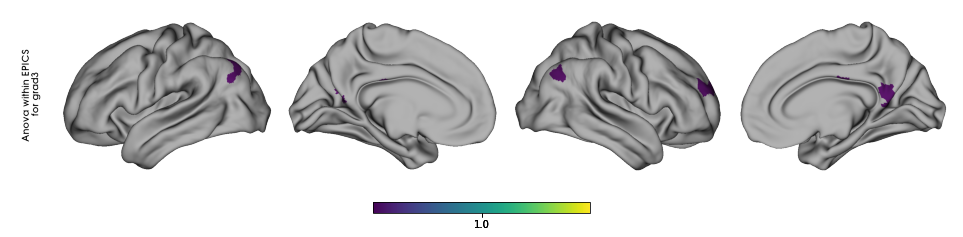

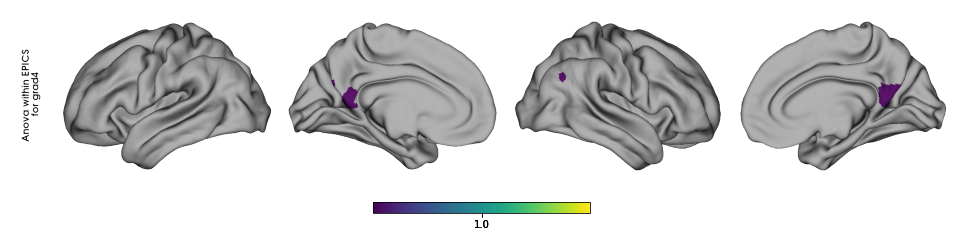

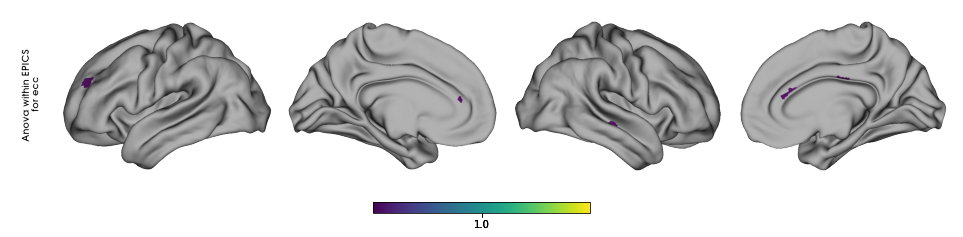

In [ ]:
for indic in df.indic.unique():
    data = d.loc[indic]

    pvals = data['p-unc'].tolist()
    signif, pvals_corr = pg.multicomp(pvals, method=FDR_METHOD)

    print('number of fdr-corrected ROIs for ', indic, ' is ', signif.sum())

    data = signif
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)

In [62]:
#todo plot fstats for valid fdr ROIs

---
for Ecc try all FDR methods

In [27]:
FDRs = ['bonf', 'sidak', 'holm', 'fdr_bh', 'fdr_by']

In [28]:
d

Source  ddof1  ddof2         F     p-unc       np2       eps  \
indic roi                                                                  
ecc   0   0   epic      2     78  0.412618  0.663351  0.010469  0.977595   
      1   0   epic      2     78  0.877221  0.420000  0.021998  0.897917   
      2   0   epic      2     78  0.666878  0.516210  0.016812  0.992531   
      3   0   epic      2     78  0.076593  0.926336  0.001960  0.963704   
      4   0   epic      2     78  0.170718  0.843373  0.004358  0.956310   
...            ...    ...    ...       ...       ...       ...       ...   
grad4 993 0   epic      2     78  3.303644  0.041955  0.078094  0.902548   
      994 0   epic      2     78  0.168505  0.845234  0.004302  0.944212   
      995 0   epic      2     78  2.837848  0.064612  0.067830  0.767592   
      996 0   epic      2     78  4.844000  0.010400  0.110483  0.985125   
      997 0   epic      2     78  0.358042  0.700187  0.009097  0.936078   

             p-GG-corr sphericity   W-spher   p-spher  
indic roi                                              
ecc   0   0        NaN        NaN       NaN       NaN  
      1   0        NaN        NaN       NaN       NaN  
      2   0        NaN        NaN       NaN       NaN  
      3   0        NaN        NaN       NaN       NaN  
      4   0        NaN        NaN       NaN       NaN  
...                ...        ...       ...       ...  
grad4 993 0        NaN        NaN       NaN       NaN  
      994 0        NaN        NaN       NaN       NaN  
      995 0   0.079653      False  0.697225  0.001057  
      996 0        NaN        NaN       NaN       NaN  
      997 0        NaN        NaN       NaN       NaN  

[4990 rows x 11 columns]

In [29]:
d1 = pd.DataFrame()

for indic in df.indic.unique():
    data = d.loc[indic]
    for fdr in FDRs:
        pvals = data['p-unc'].tolist()
        signif, _ = pg.multicomp(pvals, method=fdr)
        data[fdr] = signif
        
    data = data.reset_index().drop('level_1', axis=1)    
    data['indic'] = indic

    d1 = pd.concat([d1, data], axis=0)
    
    # print('number of', fdr, '-corrected ROIs for', indic, 'is', signif.sum())

    # signif = map_to_labels(signif, surf_labels, mask=mask_removed)
    # stack_surfplot(signif, 'Anova within EPICS\n for ' + indic, 'viridis', None)

In [30]:
d1 = d1.set_index(['indic', 'roi'])[['F', 'p-unc'] + FDRs]
d1

F     p-unc   bonf  sidak   holm  fdr_bh  fdr_by
indic roi                                                         
grad1 0    1.142850  0.324190  False  False  False   False   False
      1    0.428307  0.653135  False  False  False   False   False
      2    1.781768  0.175123  False  False  False   False   False
      3    1.480079  0.233941  False  False  False   False   False
      4    0.776597  0.463492  False  False  False   False   False
...             ...       ...    ...    ...    ...     ...     ...
ecc   993  1.047317  0.355759  False  False  False   False   False
      994  1.984302  0.144356  False  False  False   False   False
      995  0.022711  0.977552  False  False  False   False   False
      996  0.662621  0.518376  False  False  False   False   False
      997  1.260748  0.289153  False  False  False   False   False

[4990 rows x 7 columns]

In [161]:
# d1.to_csv('pg_repeated_stats.csv')

In [38]:
d1 = d1.reset_index()

In [39]:
d2 = d1[['indic']+FDRs]

In [40]:
d2.groupby('indic').sum()

bonf  sidak  holm  fdr_bh  fdr_by
indic                                   
ecc       6      6     6      61       6
grad1     1      1     1      24       1
grad2     2      2     2      14       1
grad3    14     14    14      67      24
grad4    10     10    10      37      10

<AxesSubplot:ylabel='indic'>

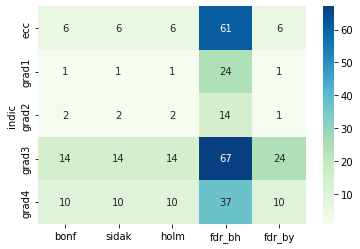

In [42]:
import seaborn as sns

sns.heatmap(data=d2.groupby('indic').sum(),
cmap="GnBu", annot=True)

In [44]:
FDR_METHOD = 'fdr_bh'

number of fdr-corrected ROIs for  ecc  is  61


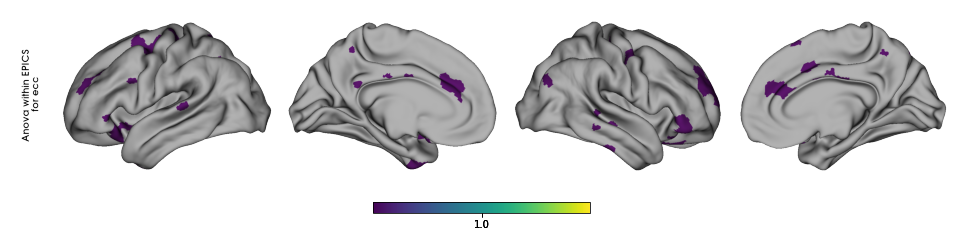

In [45]:
for indic in ['ecc']:
    data = d.loc[indic]

    pvals = data['p-unc'].tolist()
    signif, pvals_corr = pg.multicomp(pvals, method=FDR_METHOD)

    print('number of fdr-corrected ROIs for ', indic, ' is ', signif.sum())

    data = signif
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)